In [6]:
#! pip3 install opencv-python
# right version

In [3]:
import cv2
import os
import numpy as np
import pandas as pd

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Abstract

This project revolves around image classification using various types of lung X-ray images: those infected with viruses, those infected with Covid-19, and uninfected X-ray images. To begin, we will employ the CLAHE method (Contrast Limited Adaptive Histogram Equalization) to enhance the image contrast and brightness. Additionally, we will resize the images to ensure consistent image sizes throughout the dataset.

Moving forward, we will develop an image classification model using the powerful CNN (Convolutional Neural Network) architecture and Depthwise Separable CNNs, leveraging the capabilities of the tensorflow.keras package.

Lastly, we will explore an alternative approach by implementing the CNN algorithm using numpy, allowing us to compare its performance against the results obtained using the tensorflow.keras package.

## Introduction



Due to the Covid-19 pandemic, the lung is directly affected and prone to infection. However, it's important to note that the virus can also infect the lungs, leading to potential misdiagnosis based on X-ray images. In order to assist doctors in accurately diagnosing cases, it becomes crucial to perform image classification to differentiate between X-ray images of virus-infected lungs and those infected with Covid-19. To achieve this, we have obtained a dataset from Kaggle, comprising three distinct files containing uninfected lung X-ray images, virus-infected lung X-ray images, and Covid-infected lung images. To fulfill our objective, we will develop an image classification system utilizing CNN (Convolutional Neural Networks) and Depthwise Separable CNNs, leveraging the available datasets.

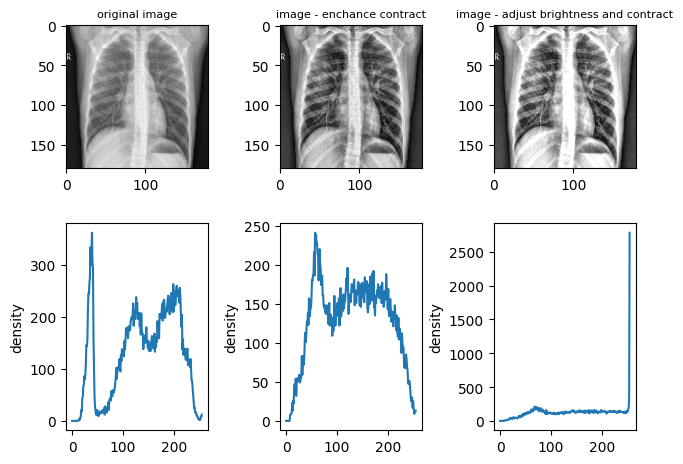

In [21]:
image = cv2.imread('/../normal/IM-0003-0001.jpeg',0)
original=cv2.resize(image,(180,180))
        
# Enhance contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(image)


# Adjust brightness
alpha = 1.2  # Brightness factor (1.0 is neutral)
adjusted_image = np.clip(alpha * enhanced_image, 0, 255).astype(np.uint8)

# Resize images
resized_image_contrat = cv2.resize(enhanced_image,(180,180))
resized_image_bright = cv2.resize(adjusted_image,(180,180))

# find frequency of pixels in range 0-255
hist1 = cv2.calcHist([original],[0],None,[256],[0,256])
hist2 = cv2.calcHist([resized_image_contrat],[0],None,[256],[0,256])
hist3=cv2.calcHist([resized_image_bright],[0],None,[256],[0,256])

# Show the plotting graph of an image
fig=plt.figure()
plt.subplot(231)
plt.imshow(original,cmap='gray')
plt.title("original image",fontsize = 8)

plt.subplot(232)
plt.imshow(resized_image_contrat, cmap='gray')
plt.title("image - enchance contract",fontsize = 8)

plt.subplot(233)
plt.imshow(resized_image_bright, cmap='gray')
plt.title("image - adjust brightness and contract",fontsize = 8)

plt.subplot(234)
plt.ylabel("density")
#plt.title("density of original image")
plt.plot(hist1)

plt.subplot(235)
plt.plot(hist2)
plt.ylabel("density")
#plt.title("density of adjusted image  - enchance contract")

plt.subplot(236)
plt.plot(hist3)
plt.ylabel("density")
#plt.title("density of adjusted image - adjust brightness")

fig.tight_layout(pad=0.5)
plt.show()

In [23]:
# data preprocessing
normal_path="/Users/windy8810/Desktop/sta208/208final_project/normal"
normal_adj="/Users/windy8810/Desktop/sta208/208final_project/adj_normal"
virus_path="/Users/windy8810/Desktop/sta208/208final_project/virus"
virus_adj="/Users/windy8810/Desktop/sta208/208final_project/adj_virus"
covid_path="/Users/windy8810/Desktop/sta208/208final_project/covid"
covid_adj="/Users/windy8810/Desktop/sta208/208final_project/adj_covid"
pathes=[normal_path,virus_path,covid_path]
adj_pathes=[normal_adj,virus_adj,covid_adj]
file_name=["normal","virus","covid"]
Label=[0,1,2]

for path,adj_path,label,file in zip(pathes,adj_pathes,Label,file_name):
    i=1
    for image_name in os.listdir(path):
        image_path = os.path.join(path, image_name)
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        
        # Enhance contrast
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        enhanced_image = clahe.apply(image)
        

        # Adjust brightness
        alpha = 1.2  # Brightness factor (1.0 is neutral)
        adjusted_image = np.clip(alpha * enhanced_image, 0, 255).astype(np.uint8)
        resized_image = cv2.resize(adjusted_image,(180,180))

        # Save the enhanced image
        new_image_path= os.path.join(adj_path, f"{file}_{i}.jpeg")
        cv2.imwrite(new_image_path, resized_image)
        i+=1


In [24]:
# get dataset information
Info=pd.DataFrame({"image name":[],"max height":[],"min heght":[],"max width":[],"min width":[],"number of images":[]})
def info_image_set(path,i,image_set):
    height=[]
    width=[]
    for image_name in os.listdir(path):
        image_path=os.path.join(path,image_name)
        image=cv2.imread(image_path)
        height.append(image.shape[0])
        width.append(image.shape[1]) 
    Info.loc[i,:]=[image_set,max(height),min(height),max(width),min(width),len(os.listdir(path))]
    

In [25]:
info_image_set(normal_path,0,"normal")
info_image_set(virus_path,1,"virus")
info_image_set(covid_path,2,"covid")
Info

,image name,max height,min heght,max width,min width,number of images
0,normal,2628.0,650.0,2890.0,1040.0,668.0
1,virus,2304.0,127.0,2273.0,384.0,619.0
2,covid,4095.0,237.0,4280.0,240.0,536.0


In [62]:
# read data : need to change the file path
normal_adj="file_path_for_storing_normal_chest_x_ray_after_adjustment"
virus_adj="file_path_for_storing_virus_chest_x_ray_after_adjustment"
covid_adj="file_path_for_storing_covid_chest_x_ray_after_adjustment"
adj_pathes=[normal_adj,virus_adj,covid_adj]
image_data=[]
Label=[0,1,2] 
denote=[]

for path,label in zip(adj_pathes,Label):
    for image_name in os.listdir(path):
        image_path=os.path.join(path,image_name)
        image=cv2.imread(image_path)
        image_data.append(image)
        denote.append(label)


In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [10]:
# visualization

def visual(image_name,path):
    sample_images = random.sample(os.listdir(path), 6)
    fig, axs = plt.subplots(2, 3, figsize=(12, 7))
    fig.suptitle(f'{image_name} Chest X-Ray', fontsize=20)

    for i, image_name in enumerate(sample_images):
        image_path = os.path.join(path, image_name)
        image = cv2.imread(image_path)
        axs[i//3, i%3].imshow(image)
        axs[i//3, i%3].axis('off')

    plt.show()

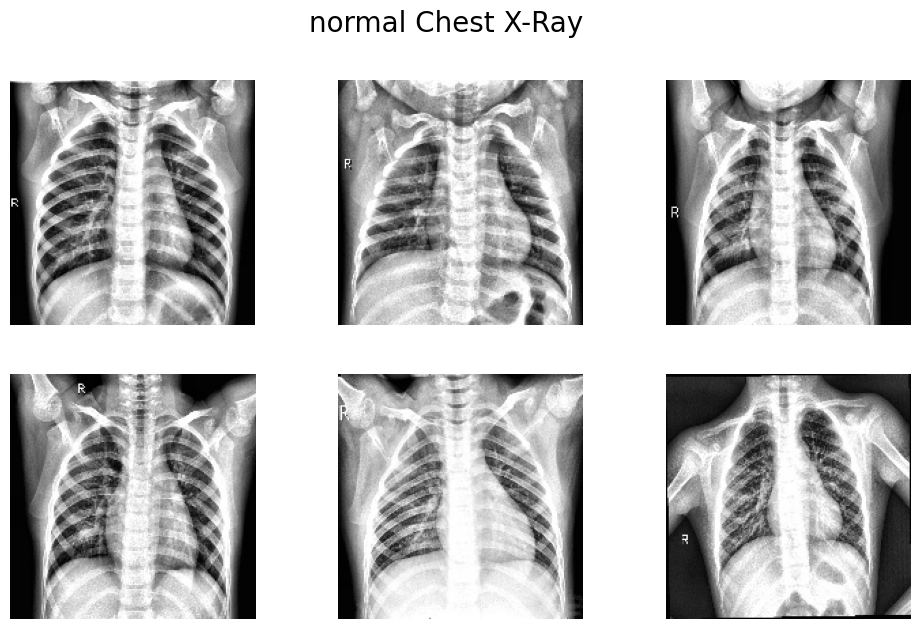

In [11]:
visual("normal",normal_adj)

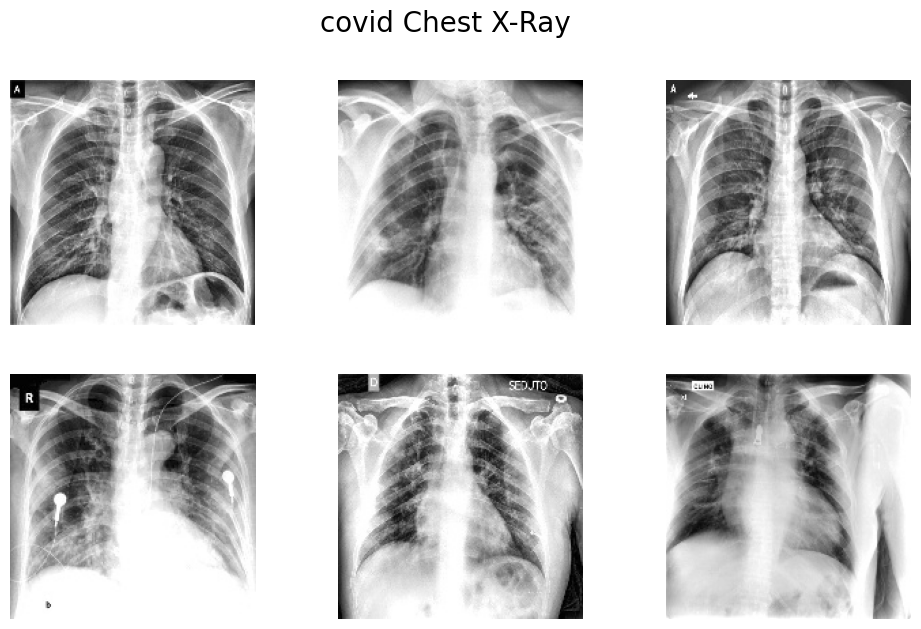

In [39]:
visual("covid",covid_adj)

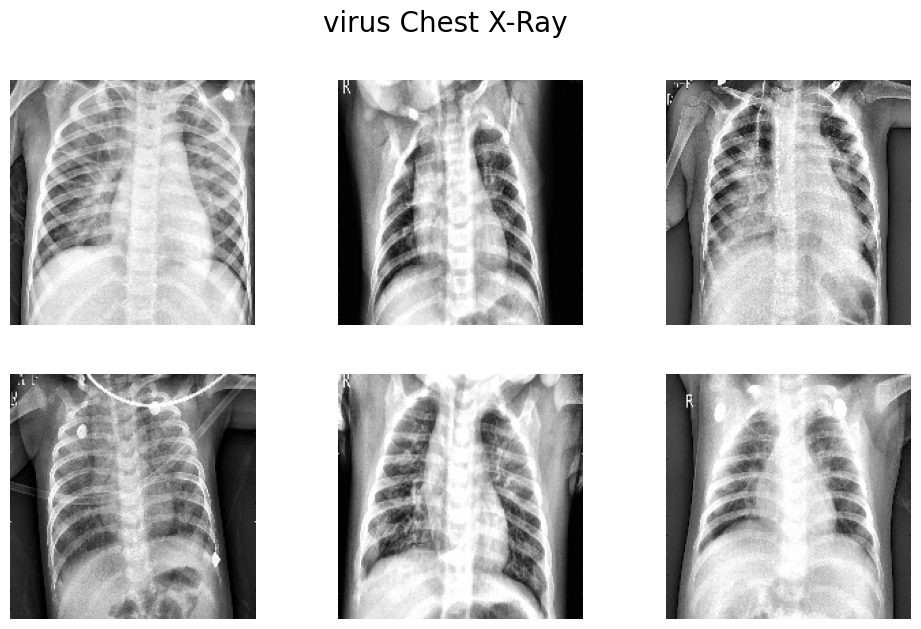

In [38]:
visual("virus",virus_adj)

In [64]:
# Normalize data
image_data_n=np.array(image_data)/255
denote=np.array(denote)

## Data spliting 
We will allocate 30% of the data to each group for testing purposes, while the remaining 70% of the data will be used for training. In the CNN model, we have set aside validation data to monitor the model's performance and prevent the occurrence of overfitting issues.

In [78]:
x_train,x_test,y_train,y_test=train_test_split(image_data_n,denote,test_size=0.3,stratify=denote,random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3) 
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [81]:
# Build CNN model 
def CNN(x_train,x_test,y_train,y_test,opt):
    
    #convlution & maxpool
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(180,180,3),strides=(1, 1),padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu',strides=(1, 1),padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu',strides=(1, 1),padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu',strides=(1, 1),padding="same"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu',strides=(1, 1),padding="same"))

    #flatten layer & output 
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(3,activation='softmax'))



    model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])
    print(opt)
    history=model.fit(x_train, y_train, epochs=30,verbose=1, batch_size=30,validation_split=0.2)
    loss,accuracy=model.evaluate(x_test,y_test)
    print(f"Test loss - {opt} : {loss:.4f}")
    print(f"Test accuracy - {opt}: {accuracy:.4f}")

    plt.figure(figsize=(10,10))
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(range(1, 31),history.history['accuracy'],label='accuracy',linestyle='--')
    axs[0].plot(range(1, 31),history.history['val_accuracy'],label='val_accuracy')
    axs[0].set_xlabel('echo')
    axs[0].set_ylabel('accuracy rate')
    axs[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    axs[1].plot(range(1, 31),history.history['loss'],label='loss',linestyle='--')
    axs[1].plot(range(1, 31),history.history['val_loss'],label='val_loss')
    axs[1].set_xlabel('echo')
    axs[1].set_ylabel('loss')
    axs[1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()


RMSprop
Epoch 1/30
34/34 [==============================] - 5s 143ms/step - loss: 1.0435 - accuracy: 0.4853 - val_loss: 0.6034 - val_accuracy: 0.6602
Epoch 2/30
34/34 [==============================] - 5s 145ms/step - loss: 0.6097 - accuracy: 0.7304 - val_loss: 0.3702 - val_accuracy: 0.8789
Epoch 3/30
34/34 [==============================] - 5s 144ms/step - loss: 0.4312 - accuracy: 0.8343 - val_loss: 0.3552 - val_accuracy: 0.8594
Epoch 4/30
34/34 [==============================] - 5s 135ms/step - loss: 0.3360 - accuracy: 0.8765 - val_loss: 0.2608 - val_accuracy: 0.9023
Epoch 5/30
34/34 [==============================] - 5s 136ms/step - loss: 0.2742 - accuracy: 0.8961 - val_loss: 0.2915 - val_accuracy: 0.8945
Epoch 6/30
34/34 [==============================] - 5s 139ms/step - loss: 0.2318 - accuracy: 0.9216 - val_loss: 0.4444 - val_accuracy: 0.8320
Epoch 7/30
34/34 [==============================] - 6s 163ms/step - loss: 0.2018 - accuracy: 0.9294 - val_loss: 0.2031 - val_accuracy: 0.921

<Figure size 1000x1000 with 0 Axes>

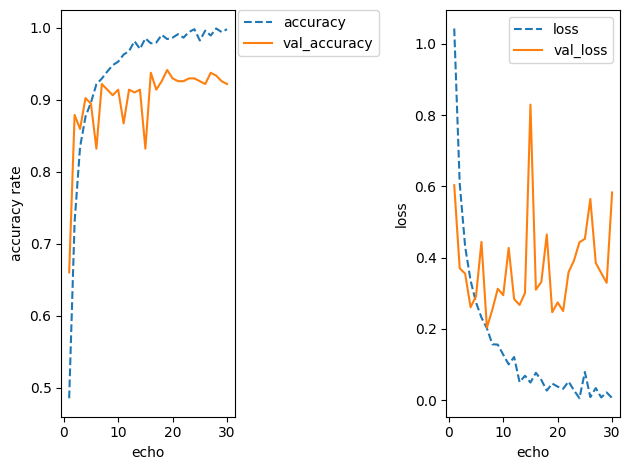

In [82]:
CNN(x_train,x_test,y_train,y_test,'RMSprop')

SGD
Epoch 1/30
34/34 [==============================] - 5s 139ms/step - loss: 1.0953 - accuracy: 0.3520 - val_loss: 1.0860 - val_accuracy: 0.3359
Epoch 2/30
34/34 [==============================] - 4s 127ms/step - loss: 1.0799 - accuracy: 0.4392 - val_loss: 1.0519 - val_accuracy: 0.5547
Epoch 3/30
34/34 [==============================] - 5s 138ms/step - loss: 1.0391 - accuracy: 0.5196 - val_loss: 0.9613 - val_accuracy: 0.6328
Epoch 4/30
34/34 [==============================] - 5s 141ms/step - loss: 0.9703 - accuracy: 0.5265 - val_loss: 0.8082 - val_accuracy: 0.6055
Epoch 5/30
34/34 [==============================] - 5s 148ms/step - loss: 0.9436 - accuracy: 0.5402 - val_loss: 0.8307 - val_accuracy: 0.6289
Epoch 6/30
34/34 [==============================] - 5s 148ms/step - loss: 0.8322 - accuracy: 0.5843 - val_loss: 0.9996 - val_accuracy: 0.5625
Epoch 7/30
34/34 [==============================] - 5s 145ms/step - loss: 0.7938 - accuracy: 0.6137 - val_loss: 0.6403 - val_accuracy: 0.7617
Ep

<Figure size 1000x1000 with 0 Axes>

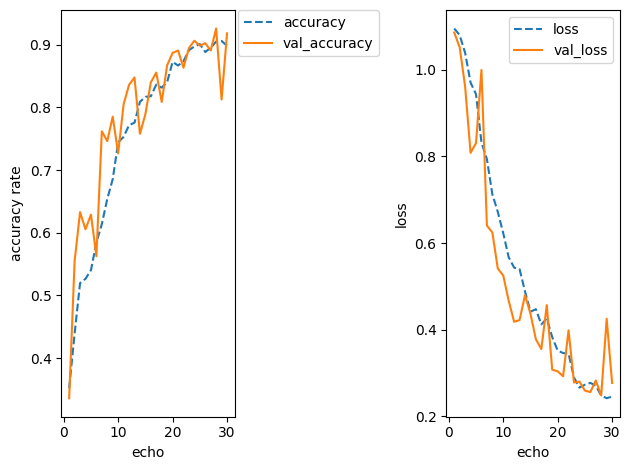

In [83]:
CNN(x_train,x_test,y_train,y_test,'SGD')

Adadelta
Epoch 1/30
28/28 [==============================] - 5s 166ms/step - loss: 1.0988 - accuracy: 0.3359 - val_loss: 1.0979 - val_accuracy: 0.4804
Epoch 2/30
28/28 [==============================] - 4s 157ms/step - loss: 1.0972 - accuracy: 0.3729 - val_loss: 1.0973 - val_accuracy: 0.5013
Epoch 3/30
28/28 [==============================] - 4s 157ms/step - loss: 1.0972 - accuracy: 0.3751 - val_loss: 1.0968 - val_accuracy: 0.4700
Epoch 4/30
28/28 [==============================] - 4s 157ms/step - loss: 1.0957 - accuracy: 0.4199 - val_loss: 1.0963 - val_accuracy: 0.4360
Epoch 5/30
28/28 [==============================] - 4s 158ms/step - loss: 1.0950 - accuracy: 0.4199 - val_loss: 1.0959 - val_accuracy: 0.4047
Epoch 6/30
28/28 [==============================] - 4s 156ms/step - loss: 1.0944 - accuracy: 0.4423 - val_loss: 1.0956 - val_accuracy: 0.3760
Epoch 7/30
28/28 [==============================] - 4s 159ms/step - loss: 1.0941 - accuracy: 0.4188 - val_loss: 1.0953 - val_accuracy: 0.35

<Figure size 1000x1000 with 0 Axes>

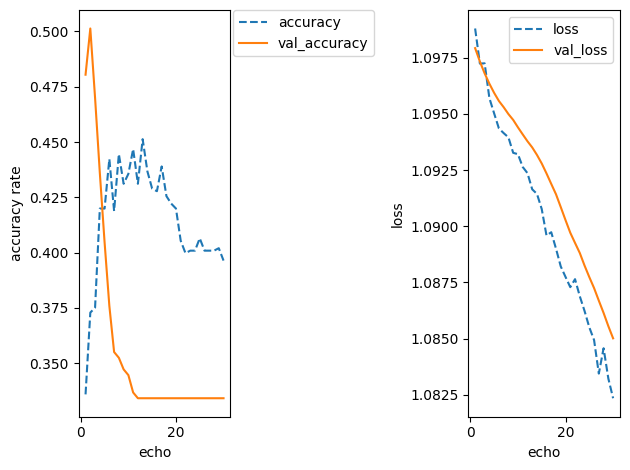

In [ ]:
CNN(x_train,x_test,y_train,y_test,'Adadelta')

Adagrad
Epoch 1/30
34/34 [==============================] - 6s 183ms/step - loss: 1.0923 - accuracy: 0.3441 - val_loss: 1.0755 - val_accuracy: 0.3867
Epoch 2/30
34/34 [==============================] - 6s 163ms/step - loss: 1.0745 - accuracy: 0.4255 - val_loss: 1.0598 - val_accuracy: 0.3711
Epoch 3/30
34/34 [==============================] - 6s 166ms/step - loss: 1.0547 - accuracy: 0.4539 - val_loss: 1.0241 - val_accuracy: 0.5508
Epoch 4/30
34/34 [==============================] - 6s 177ms/step - loss: 1.0181 - accuracy: 0.5235 - val_loss: 0.9768 - val_accuracy: 0.5391
Epoch 5/30
34/34 [==============================] - 6s 167ms/step - loss: 0.9798 - accuracy: 0.5363 - val_loss: 0.8859 - val_accuracy: 0.7031
Epoch 6/30
34/34 [==============================] - 6s 165ms/step - loss: 0.9125 - accuracy: 0.5735 - val_loss: 0.7994 - val_accuracy: 0.6992
Epoch 7/30
34/34 [==============================] - 5s 161ms/step - loss: 0.8514 - accuracy: 0.5814 - val_loss: 0.7231 - val_accuracy: 0.761

<Figure size 1000x1000 with 0 Axes>

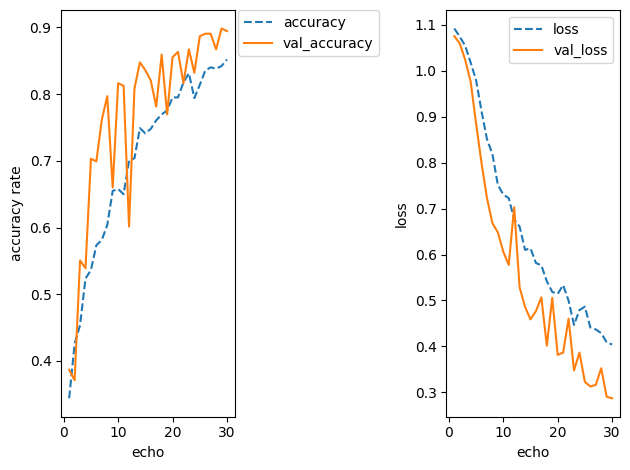

In [84]:
CNN(x_train,x_test,y_train,y_test,'Adagrad')

Adam
Epoch 1/30
34/34 [==============================] - 6s 182ms/step - loss: 0.9197 - accuracy: 0.5245 - val_loss: 0.5526 - val_accuracy: 0.6914
Epoch 2/30
34/34 [==============================] - 6s 190ms/step - loss: 0.5095 - accuracy: 0.7853 - val_loss: 0.4237 - val_accuracy: 0.8320
Epoch 3/30
34/34 [==============================] - 6s 191ms/step - loss: 0.3397 - accuracy: 0.8735 - val_loss: 0.2347 - val_accuracy: 0.9141
Epoch 4/30
34/34 [==============================] - 6s 190ms/step - loss: 0.2372 - accuracy: 0.9176 - val_loss: 0.1978 - val_accuracy: 0.9336
Epoch 5/30
34/34 [==============================] - 7s 192ms/step - loss: 0.2024 - accuracy: 0.9275 - val_loss: 0.2154 - val_accuracy: 0.9219
Epoch 6/30
34/34 [==============================] - 7s 194ms/step - loss: 0.1584 - accuracy: 0.9451 - val_loss: 0.1872 - val_accuracy: 0.9375
Epoch 7/30
34/34 [==============================] - 6s 191ms/step - loss: 0.1856 - accuracy: 0.9225 - val_loss: 0.1728 - val_accuracy: 0.9414
E

<Figure size 1000x1000 with 0 Axes>

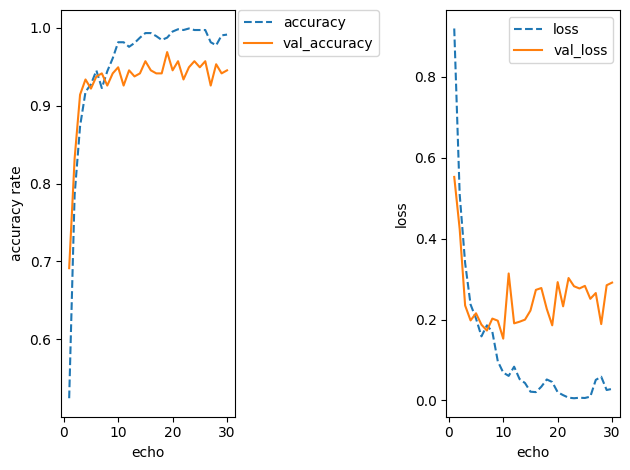

In [85]:
CNN(x_train,x_test,y_train,y_test,'Adam')

## Reference
1. CLAHE (Contrast Limited Adaptive Histogram Equalization). Clahe (Contrast Limited adaptive his- togram equalization). (2017, November 27). https://amroamroamro.github.io/mexopencv/opencv/clahe_demo_gui.html

2. Siddhartha, M. (2021, July 19). Covid CXR Image Dataset (Research). Kaggle.
https://www.kaggle.com/datasets/sid321axn/covid-cxr-image-dataset-research